In [1]:
# Import physical constants
from physical_constants import *

# Import classes
from solver import *

import numpy as np

resolution = 1e3 # 0.01 km

# Neutron Star

In this jupyter notebook, we will study neutron stars. 

The first model we are going to consider is a degenerate ($T=0$) ideal (non-interacting) Fermi gas of neutrons. 

Then, we will add electrons and protons, satisfying the beta (weak-interaction) equilibrium.

Finally, we will add nuclear interactions such as empirical or Skyrme Hartree-Fock ones.

### Non-relativistic degenerate ideal Fermi gas of neutron

Consider a degenerate ($T=0$) ideal (non-interacting) Fermi gas of neutrons. The phase space distribution function is given by the Fermi-Dirac statistics in the limit $T=0$. 

In the non-relativistic limit, the equation of state is

$$ p = \frac{\hbar^2}{15 \pi^2 m_n} \Big ( \frac{3 \pi^2}{m_n c^2}\Big)^{5/3} \epsilon^{5/3} = K_{nonrel} \epsilon^{5/3}$$

#### Fixed pressure

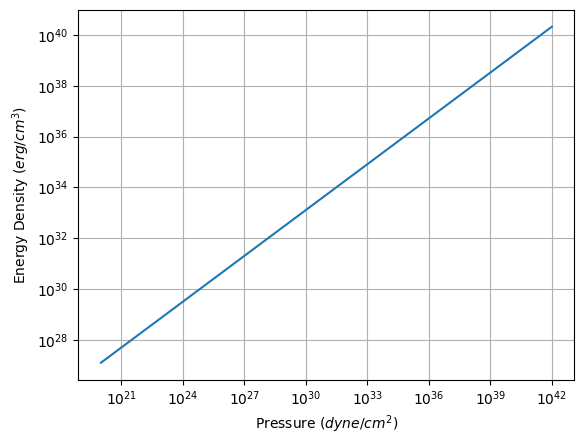

In [2]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_nonrel.csv"
EoS.load_from_file(file_path)
eos = EoS.interpolate() 
EoS.plot()

In [3]:
# Newtonian system with initial pressures of 10^32
p0 = 1e32
solver = SolverSinglePressure(eos, relativity_corrections=False)
solver.solve(resolution, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 27.45 km
The mass is M = 0.1671 M_sun


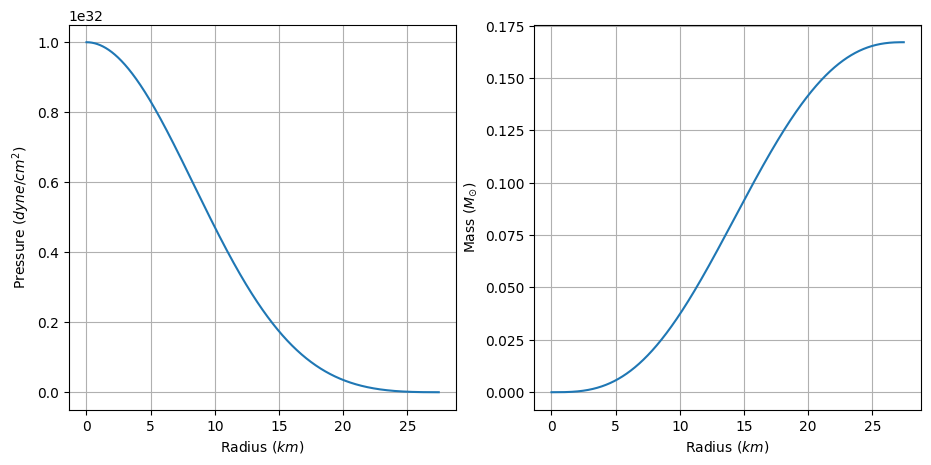

In [4]:
solver.plot()

In [5]:
# TOV system with initial pressures of 10^32
p0 = 1e32
solver = SolverSinglePressure(eos, relativity_corrections=True)
solver.solve(resolution, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 27.14 km
The mass is M = 0.1613 M_sun


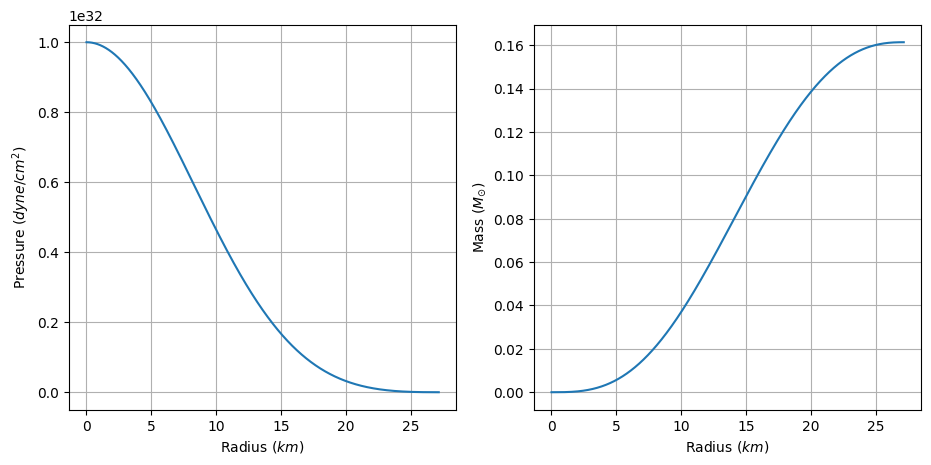

In [6]:
solver.plot()

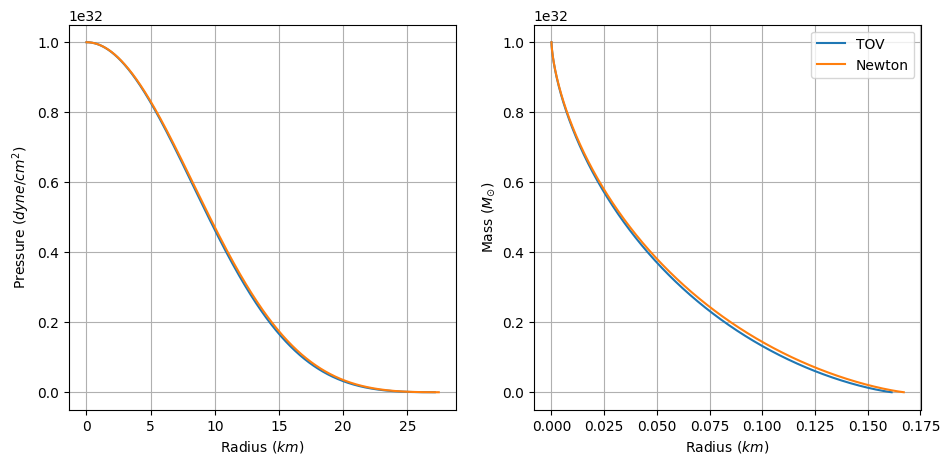

In [7]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_m, tov_p, label="TOV")
axs[1].plot(newton_m, newton_p, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [8]:
# Newtonian system with running initial pressures logarithmically from 31 to 34
resolution = 1e3 # 1 km
range_initial_pressures = np.logspace(31, 34, 40)
solver = SolverRangePressure(eos, relativity_corrections=False)
solver.solve(resolution, range_initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.665 M_sun, 
which corresponds to a radius of R = 17.32 km
and a central pressure of P = 1e+34 dyne/cm^2


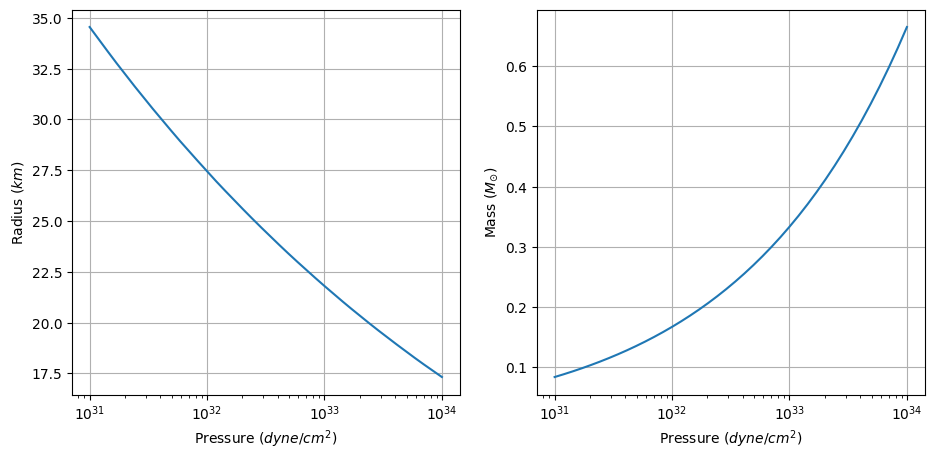

In [9]:
solver.plot_MRvsP()

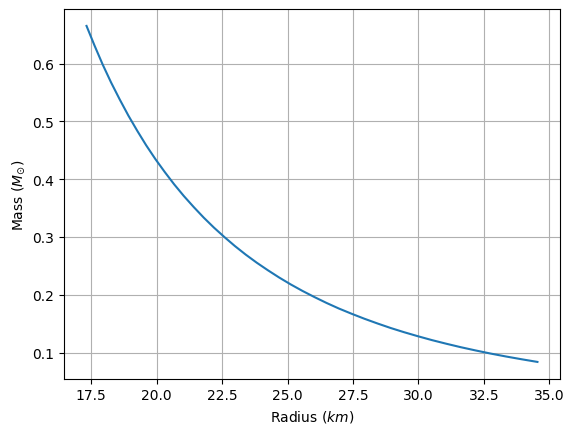

In [10]:
solver.plot_RvsM()

In [11]:
# Newtonian system with running initial pressures logarithmically from 31 to 34
resolution = 1e3 # 1 km
range_initial_pressures = np.logspace(31, 34, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
tov_r, tov_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.539 M_sun, 
which corresponds to a radius of R = 16.21 km
and a central pressure of P = 1e+34 dyne/cm^2


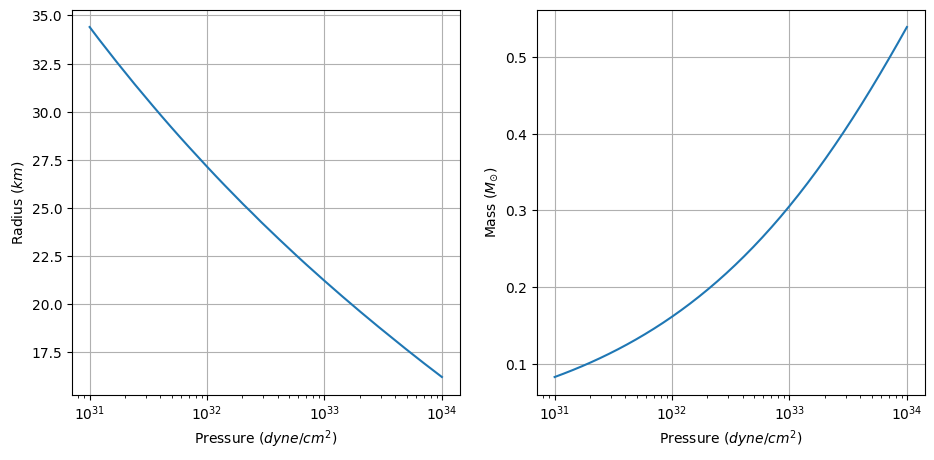

In [12]:
solver.plot_MRvsP()

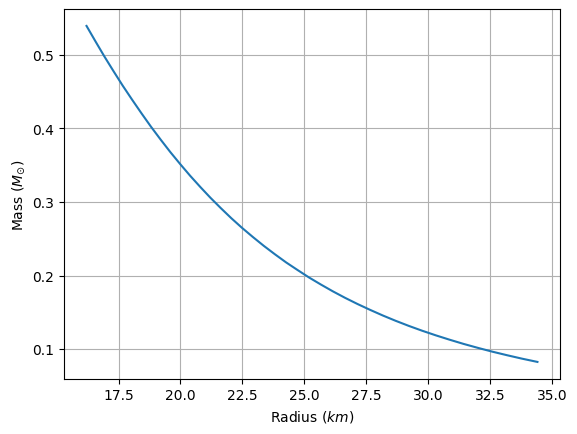

In [13]:
solver.plot_RvsM()

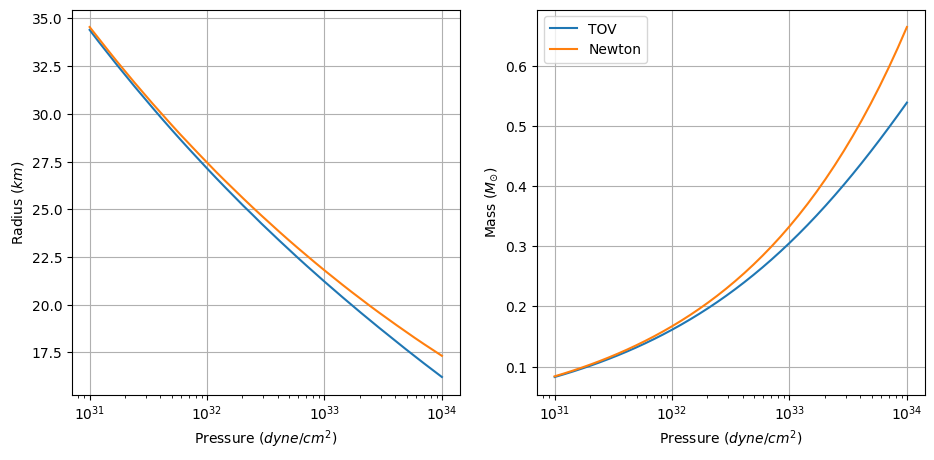

In [14]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(range_initial_pressures, tov_r, label="TOV")
axs[0].plot(range_initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(range_initial_pressures, tov_m, label="TOV")
axs[1].plot(range_initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

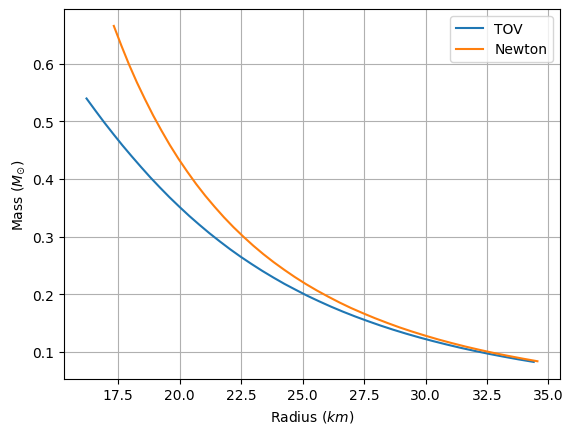

In [15]:
plt.plot(tov_r, tov_m, label="TOV")
plt.plot(newton_r, newton_m, label="Newton")
plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\\odot}$)")
plt.grid(True)
plt.legend()
plt.show()

### Generic degenerate ideal Fermi gas of neutron

Instead, the generic equation of state can be found by looking at pressure and energy density in terms of Fermi momentum $k_F$

$$ p(x) = \frac{\epsilon_0}{24} \Big ( (2 x^3 - 3 x)(1 + x^2)^{1/2} + 3 \sinh^{-1} (x) \Big) $$
$$ \epsilon(x) = n m_n c^2 + \frac{\epsilon_0}{8} \Big ( (2 x^3 + x)(1 + x^2)^{1/2} - \sinh^{-1} (x) \Big) $$

where $\epsilon_0 = \frac{m_n^4 c^5}{\pi^2 \hbar^3}$ and $x = \frac{k_F}{m_n c}$.

#### Fixed pressure

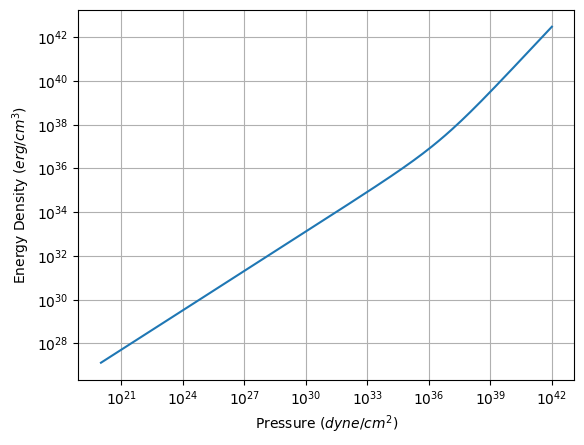

In [16]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_gen.csv"
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
EoS.plot()

In [17]:
# Newtonian system with initial pressures of 10^32
p0 = 1e34
solver = SolverSinglePressure(eos, relativity_corrections=False)
solver.solve(resolution, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 16.85 km
The mass is M = 0.5984 M_sun


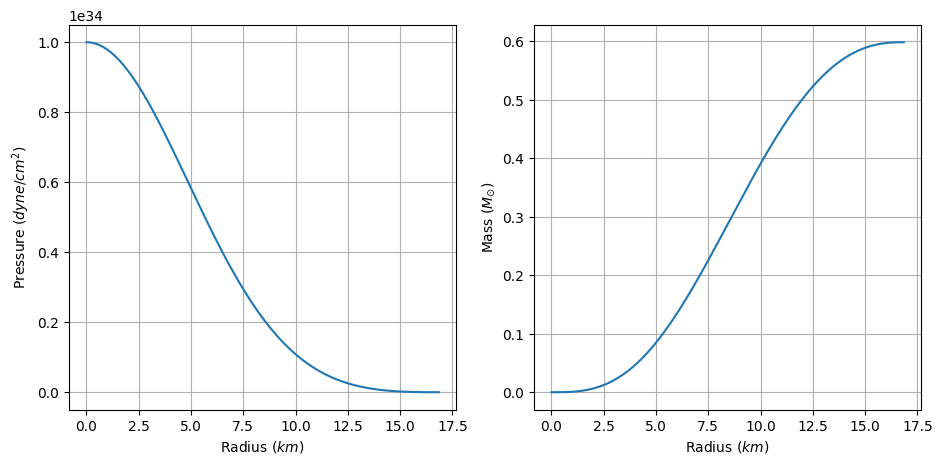

In [18]:
solver.plot()

In [19]:
# TOV system with initial pressures of 10^32
p0 = 1e34
solver = SolverSinglePressure(eos, relativity_corrections=True)
solver.solve(resolution, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 15.84 km
The mass is M = 0.4912 M_sun


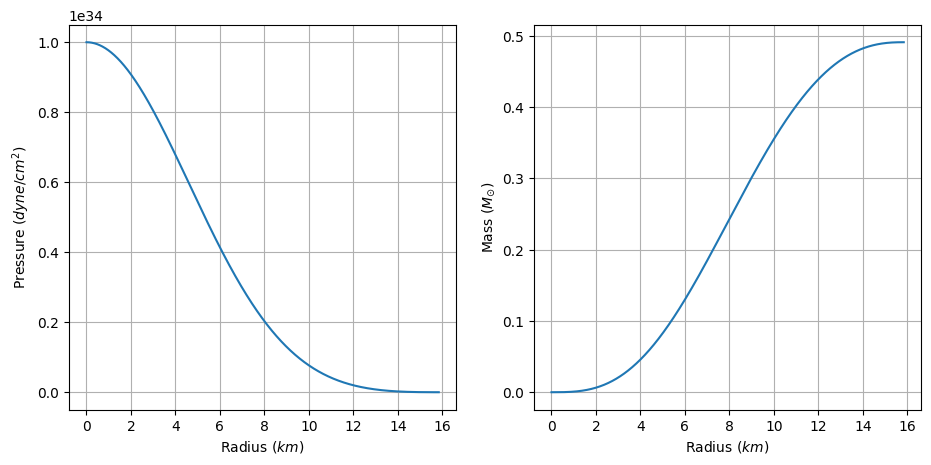

In [20]:
solver.plot()

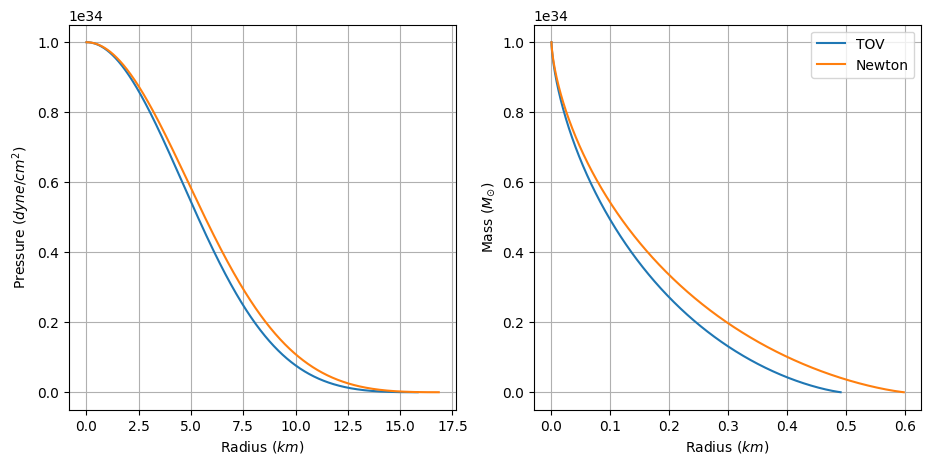

In [21]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_m, tov_p, label="TOV")
axs[1].plot(newton_m, newton_p, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [22]:
# Newtonian system with running initial pressures logarithmically from 31 to 41
range_initial_pressures = np.logspace(31, 41, 40)
solver = SolverRangePressure(eos, relativity_corrections=False)
solver.solve(resolution, range_initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 1.647 M_sun, 
which corresponds to a radius of R = 7.01 km
and a central pressure of P = 7.896522868499733e+36 dyne/cm^2


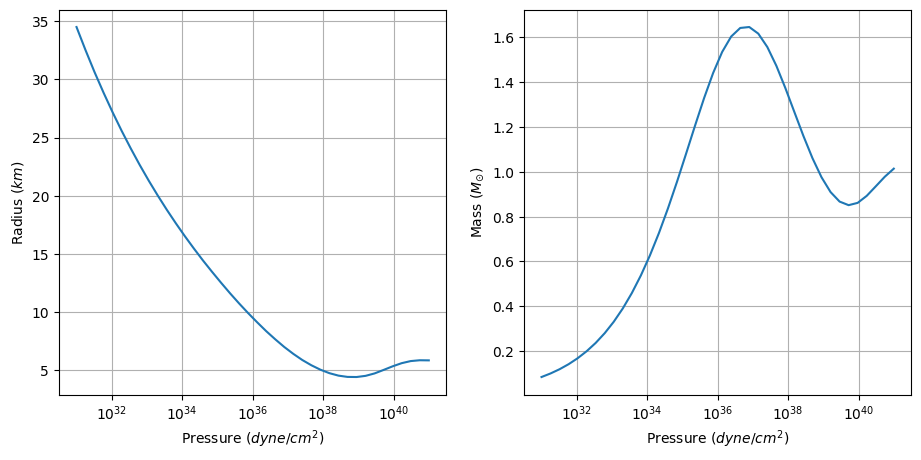

In [23]:
solver.plot_MRvsP()

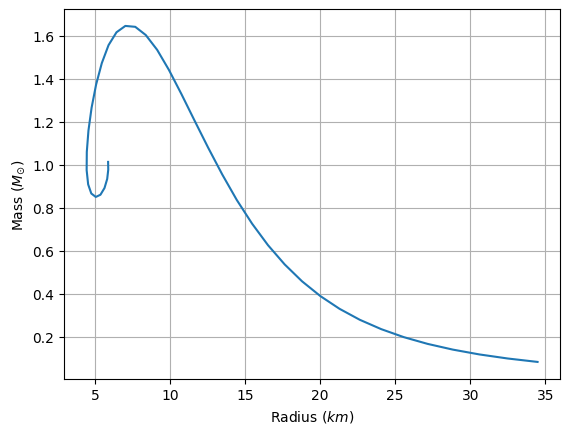

In [24]:
solver.plot_RvsM()

In [25]:
# Newtonian system with running initial pressures logarithmically from 31 to 41
range_initial_pressures = np.logspace(31, 41, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
tov_r, tov_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 0.71 M_sun, 
which corresponds to a radius of R = 8.97 km
and a central pressure of P = 4.124626382901331e+35 dyne/cm^2


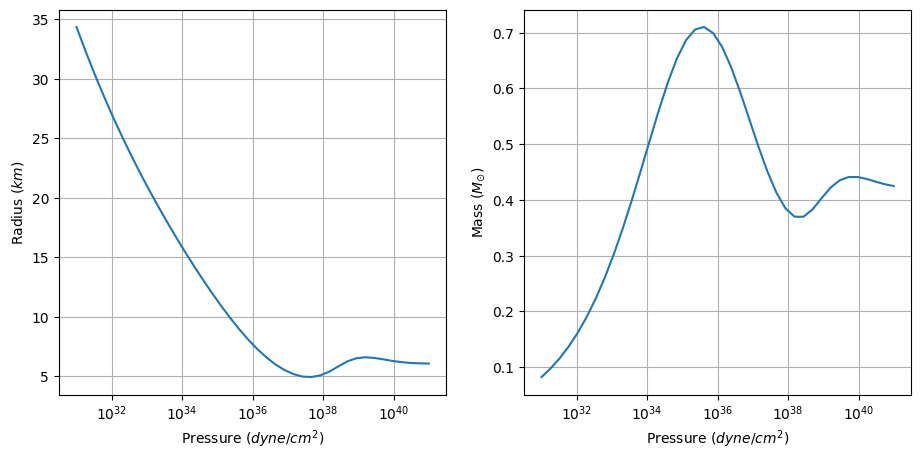

In [26]:
solver.plot_MRvsP()

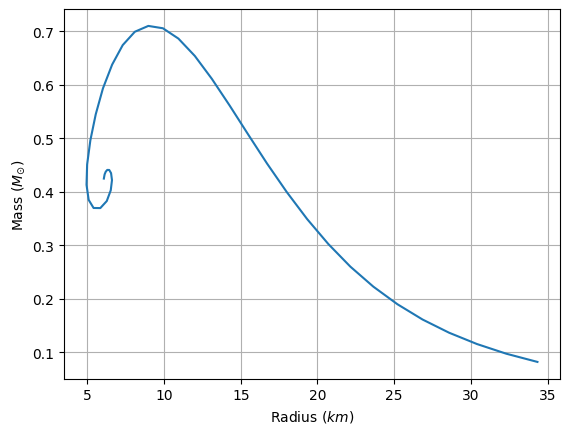

In [27]:
solver.plot_RvsM()

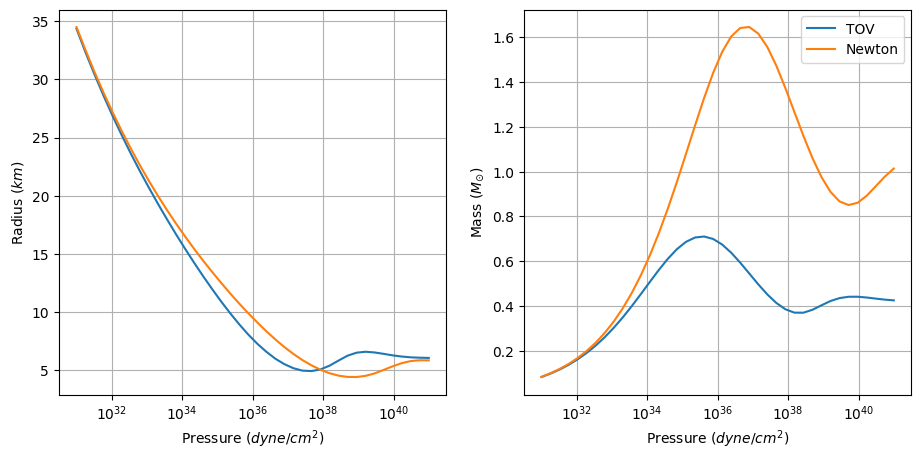

In [28]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(range_initial_pressures, tov_r, label="TOV")
axs[0].plot(range_initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(range_initial_pressures, tov_m, label="TOV")
axs[1].plot(range_initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

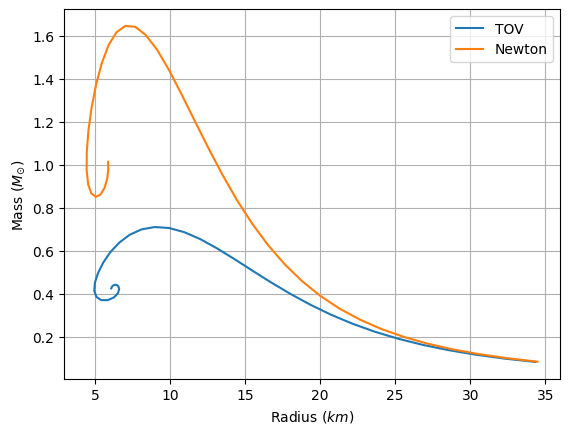

In [29]:
plt.plot(tov_r, tov_m, label="TOV")
plt.plot(newton_r, newton_m, label="Newton")
plt.xlabel("Radius ($km$)")
plt.ylabel("Mass ($M_{\\odot}$)")
plt.grid(True)
plt.legend()
plt.show()

### Degenerate ideal Fermi gas of neutron, protons and electrons

A neutron star is not made only of neutrons, but also of protons and electrons. In fact, protons, neutron and electrons react via weak interactions $$p + e^- \rightarrow n + \nu_e$$

We can find the equation of state by computing pressure and energy density for each particle species $$ p_{tot} = \sum_i p_i ~, \quad p_i = \frac{\epsilon_0}{24} \Big ( (2 x_i^3 - 3 x_i)(1 + x_i^2)^{1/2} + 3 \sinh^{-1} (x_i) \Big) $$
$$ \epsilon_{tot} = \sum_i \epsilon_i ~, \quad \epsilon_i = n_i m_i c^2 + \frac{\epsilon_0}{8} \Big ( (2 x_i^3 + x_i)(1 + x_i^2)^{1/2} - \sinh^{-1} (x_i) \Big) $$ 
keeping in mind that beta equilibrium constrains Fermi momenta to be 
$$ \sqrt{k_n^2 c^2 + m_n^2 c^4} = \sqrt{k_p^2 c^2 + m_p^2 c^4} + \sqrt{k_e^2 c^2 + m_e^2 c^4} $$ 
and charge neutrality $k_p = k_e$.

#### Fixed pressure

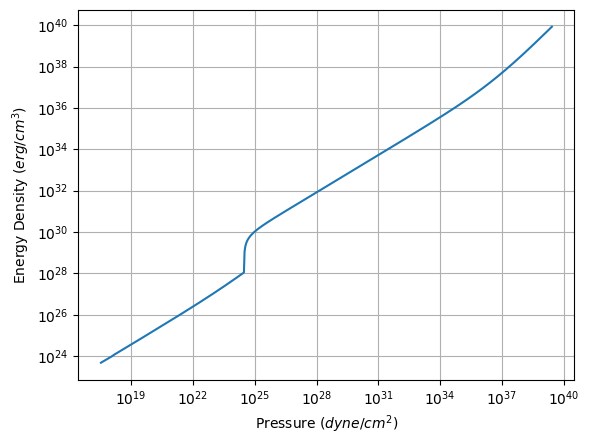

In [30]:
# Load equation of state
EoS = EquationOfState()
file_path = "data/fermi_npe.csv"
EoS.load_from_file(file_path)
eos = EoS.interpolate() 
EoS.plot()

In [31]:
# Newtonian system with initial pressures of 10^35
p0 = 1e35
solver = SolverSinglePressure(eos, relativity_corrections=False)
solver.solve(resolution, p0)
newton_r, newton_m, newton_p = solver.get()
solver.print_mass_radius()

The radius is R = 12.87 km
The mass is M = 1.0183 M_sun


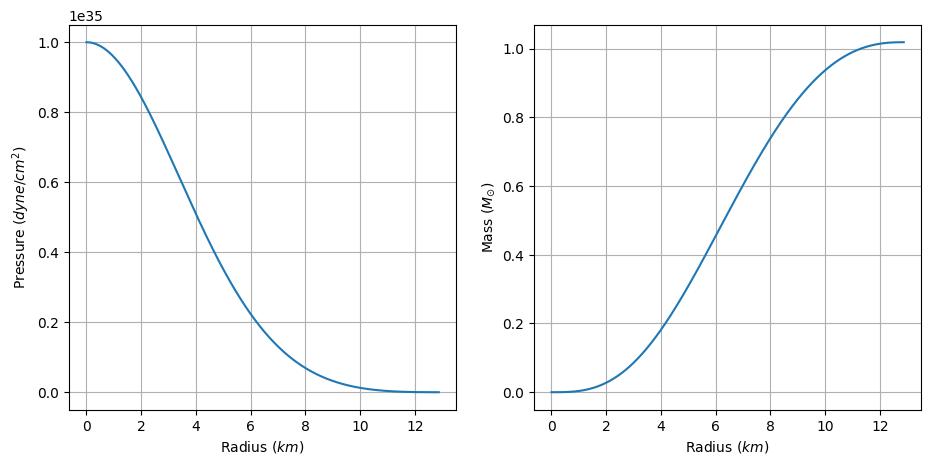

In [32]:
solver.plot()

In [33]:
# TOV system with initial pressures of 10^32
p0 = 1e35
solver = SolverSinglePressure(eos, relativity_corrections=True)
solver.solve(resolution, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 11.33 km
The mass is M = 0.6691 M_sun


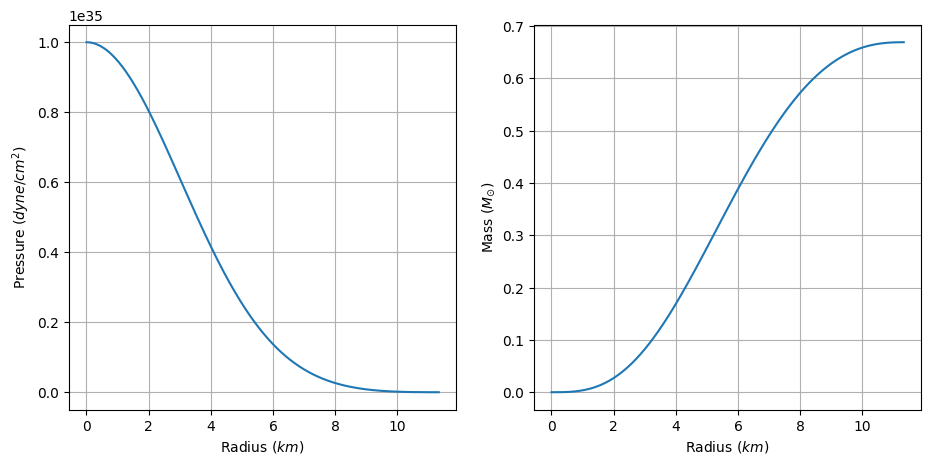

In [34]:
solver.plot()

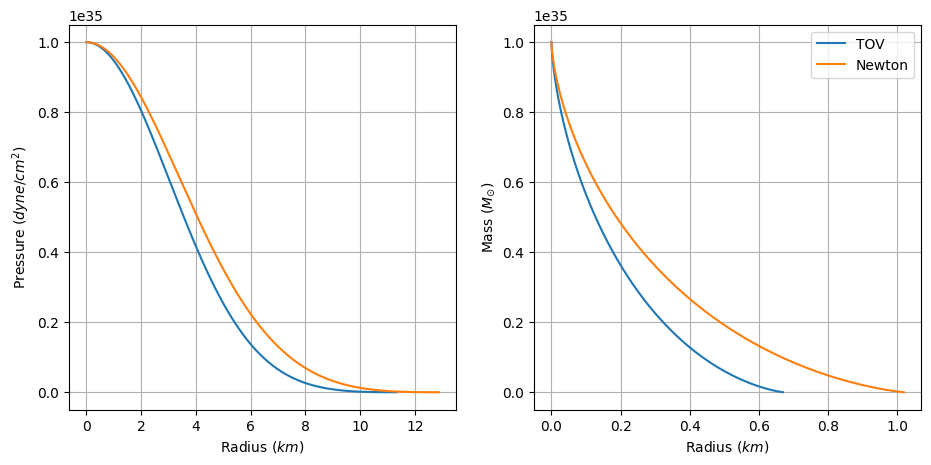

In [35]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(tov_r, tov_p, label="TOV")
axs[0].plot(newton_r, newton_p, label="Newton")
axs[0].set_xlabel("Radius ($km$)")
axs[0].set_ylabel("Pressure ($dyne / cm^2$)")
axs[0].grid(True)
axs[1].plot(tov_m, tov_p, label="TOV")
axs[1].plot(newton_m, newton_p, label="Newton")
axs[1].set_xlabel("Radius ($km$)")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].grid(True)
plt.legend()
plt.show()

#### Running pressures

In [36]:
# Newtonian system with running initial pressures logarithmically from 22 to 40
solver = SolverRangePressure(eos, relativity_corrections=False)
resolution = 1e5 # 1 km
range_initial_pressures = np.logspace(22, 30, 20)
solver.solve(resolution, range_initial_pressures)
resolution = 1e4 # 0.1 km
range_initial_pressures = np.logspace(30, 37, 20)
solver.solve(resolution, range_initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 3.87 M_sun, 
which corresponds to a radius of R = 11988.0 km
and a central pressure of P = 1.6237767391887176e+26 dyne/cm^2


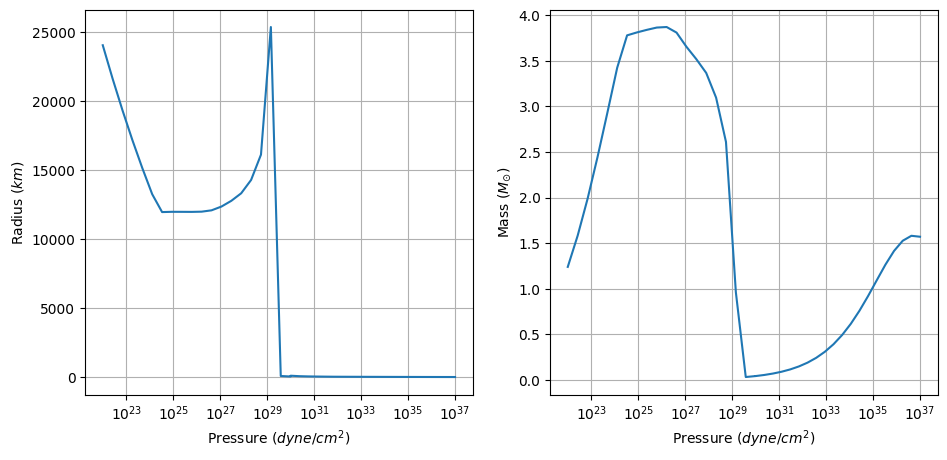

In [37]:
solver.plot_MRvsP()

In [38]:
# TOV system with running initial pressures logarithmically from 22 to 37
solver = SolverRangePressure(eos, relativity_corrections=True)
resolution = 1e5 # 1 km
range_initial_pressures_1 = np.logspace(22, 30, 20)
solver.solve(resolution, range_initial_pressures_1)
resolution = 1e4 # 0.1 km
range_initial_pressures_2 = np.logspace(30, 37, 20)
solver.solve(resolution, range_initial_pressures_2)
tov_r, tov_m, p = solver.get()
range_initial_pressures = np.append(range_initial_pressures_1, range_initial_pressures_2)
solver.print_max_mass()

The maximum mass is M = 3.862 M_sun, 
which corresponds to a radius of R = 11981.0 km
and a central pressure of P = 1.6237767391887176e+26 dyne/cm^2


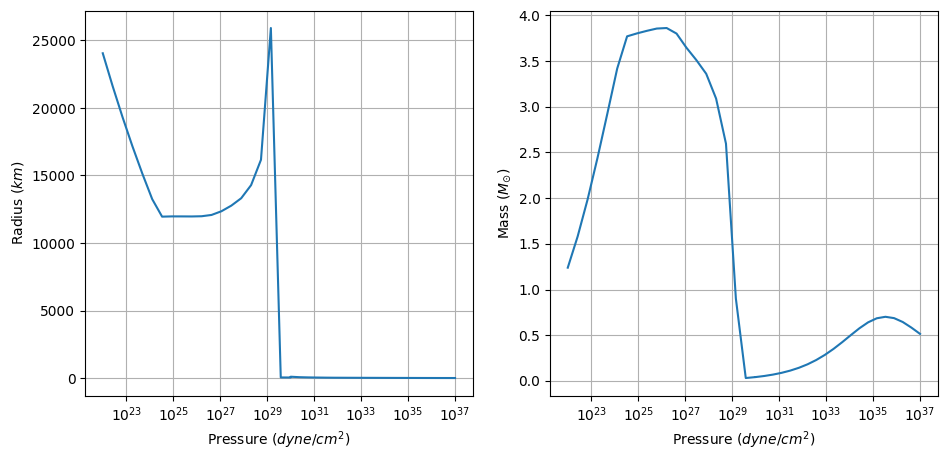

In [39]:
solver.plot_MRvsP()

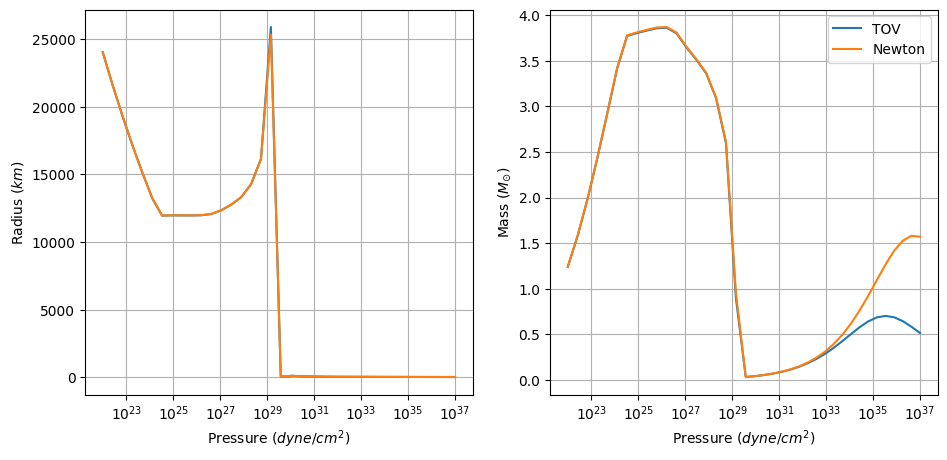

In [40]:
# Comparison between Newtonian and TOV systems
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].plot(range_initial_pressures, tov_r, label="TOV")
axs[0].plot(range_initial_pressures, newton_r, label="Newton")
axs[0].set_ylabel("Radius ($km$)")
axs[0].set_xlabel("Pressure ($dyne / cm^2$)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(range_initial_pressures, tov_m, label="TOV")
axs[1].plot(range_initial_pressures, newton_m, label="Newton")
axs[1].set_ylabel("Mass ($M_{\\odot}$)")
axs[1].set_xlabel("Pressure ($dyne / cm^2$)")
axs[1].set_xscale("log")
axs[1].grid(True)
plt.legend()
plt.show()

### Empirical interactions

Now, we introduce interaction. The first model is based on the Weiersacker formula or empirical interactions. In presence of asymmetric matter, the equation of state can be found by looking at pressure and energy density in terms of number density $n$

$$ p(n) = n_0 \Big ( \frac{2}{3} <E_0> u^{5/3} + \frac{A}{2} u^2 + \frac{B \sigma}{\sigma + 1} u^{\sigma + 1} + (2^{2/3} - 1) <E_0> (\frac{2}{3} u^{5/3} - u^2) + S_0 u^2 \Big ) $$
$$ \epsilon(n) = n \Big ( m_n c^2 + 2^{2/3} <E_0> u^{2/3} + \frac{A}{2} u + \frac{B}{\sigma + 1} u^\sigma + (S_0 - (2^{2/3} - 1)<E_0>) u \Big )

where $u = \frac{n}{n_0}$.

#### Fixed pressure

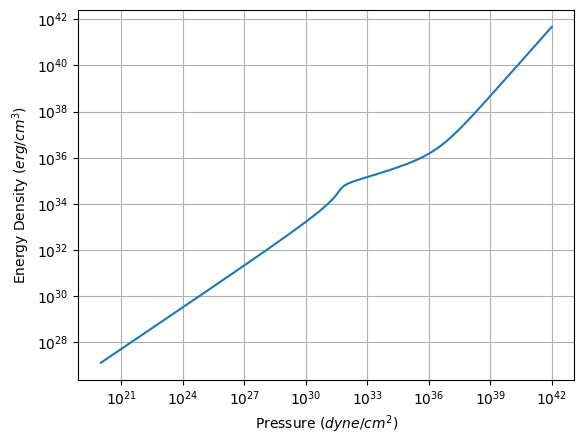

In [41]:
# Load equation of state
resolution = 1e3 # 0.01 km
EoS = EquationOfState()
file_path = "data/emp.csv"
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
EoS.plot()

In [42]:
# TOV system with initial pressures of 10^35
p0 = 1e35
solver = SolverSinglePressure(eos, relativity_corrections=True)
solver.solve(resolution, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 13.64 km
The mass is M = 1.8652 M_sun


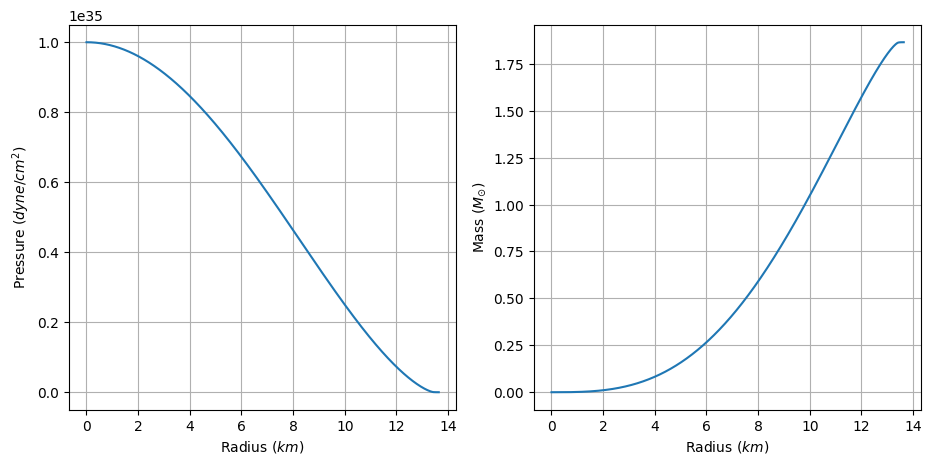

In [43]:
solver.plot()

#### Running pressures

In [44]:
# Newtonian system with running initial pressures logarithmically from 32.5 to 40
range_initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 2.791 M_sun, 
which corresponds to a radius of R = 12.59 km
and a central pressure of P = 9.152473108773856e+35 dyne/cm^2


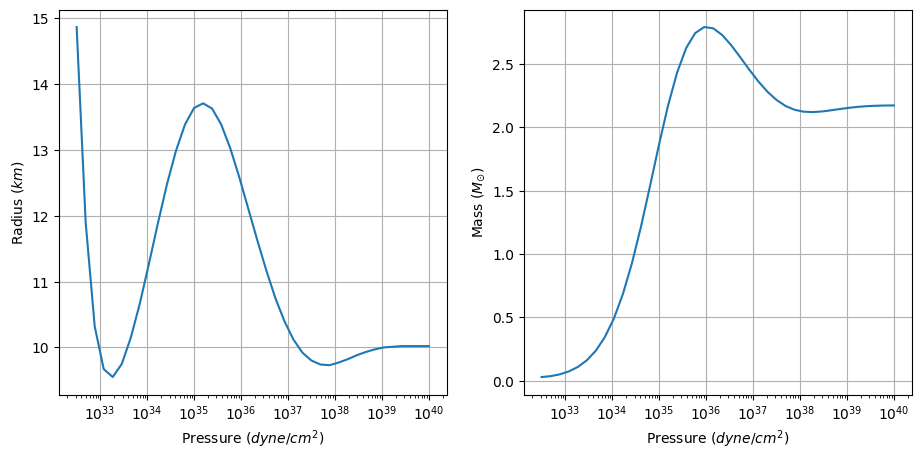

In [45]:
solver.plot_MRvsP()

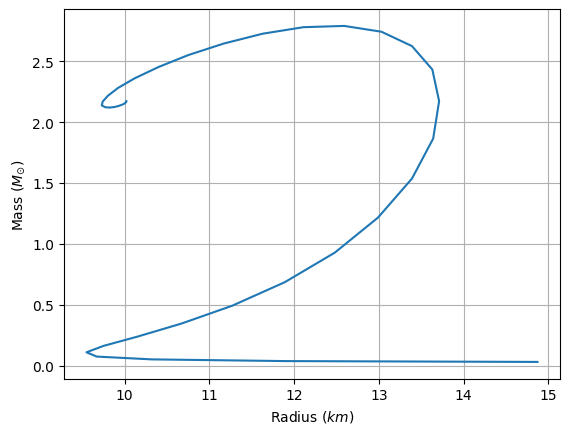

In [46]:
solver.plot_RvsM()

### Skyrme Hatree-Fock interactions

The second model is based on Skyrme interaction calculated applying the Hartree-Fock method. The equation of state can be found by looking at pressure and energy density in terms of number density $n$

$$ p(n) = \frac{2(3 \pi^2 \hbar^3)^{2/3}}{10 m_n} n^{5/3} + \frac{t_3}{12} n^3 - \frac{t_0}{4}n^2 ~, $$
$$ \epsilon(n) = m_n n c^2 + \frac{3(3 \pi^2 \hbar^3)^{2/3}}{10 m_n} n^{5/3} + \frac{t_3}{24} n^3 - \frac{t_0}{4}n^2 . $$

#### Fixed pressure

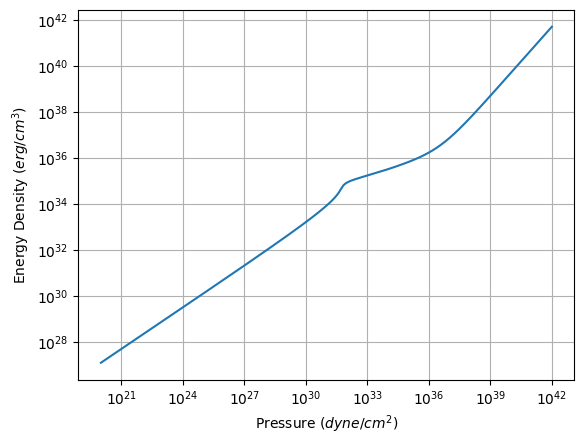

In [47]:
# Load equation of state
resolution = 1e3 # 0.01 km
EoS = EquationOfState()
file_path = "data/sky.csv"
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
EoS.plot()

In [48]:
# TOV system with initial pressures of 10^35
p0 = 1e35
solver = SolverSinglePressure(eos, relativity_corrections=True)
solver.solve(resolution, p0)
tov_r, tov_m, tov_p = solver.get()
solver.print_mass_radius()

The radius is R = 11.97 km
The mass is M = 1.4848 M_sun


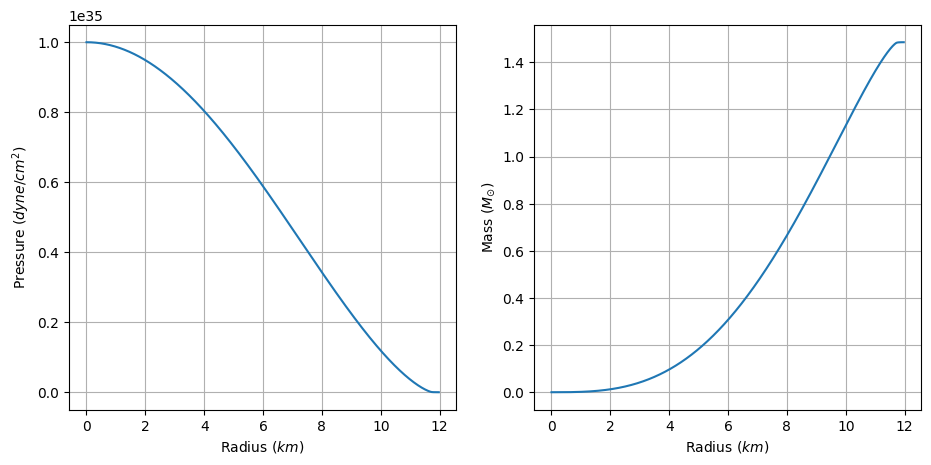

In [49]:
solver.plot()

#### Running pressures

In [50]:
# Newtonian system with running initial pressures logarithmically from 32.5 to 40
range_initial_pressures = np.logspace(32.5, 40, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
newton_r, newton_m, p = solver.get()
solver.print_max_mass()

The maximum mass is M = 2.437 M_sun, 
which corresponds to a radius of R = 10.88 km
and a central pressure of P = 1.4251026703029964e+36 dyne/cm^2


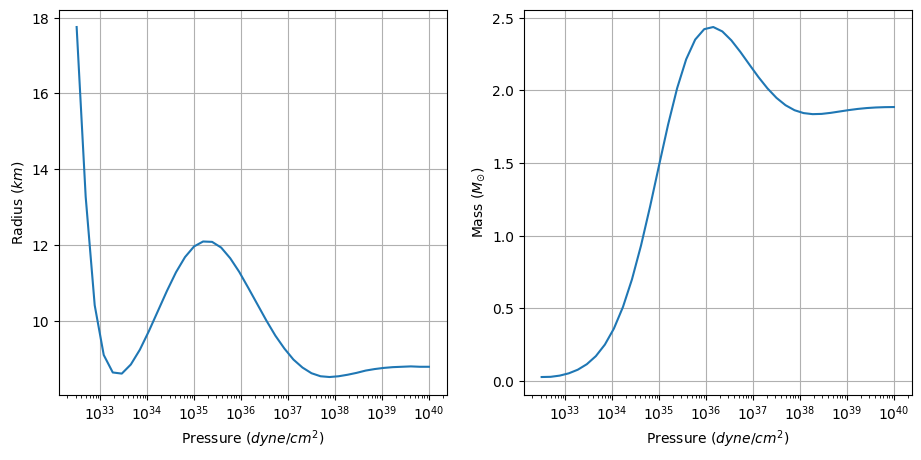

In [51]:
solver.plot_MRvsP()

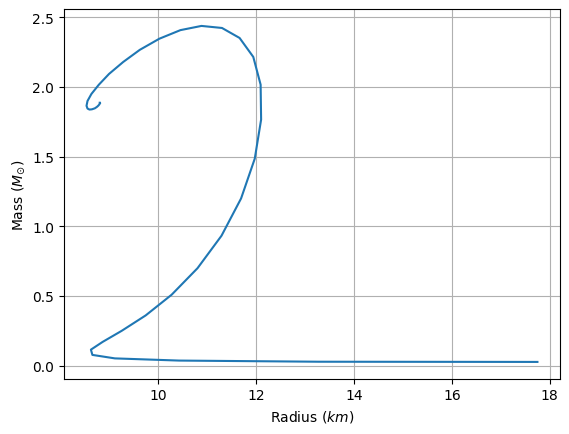

In [52]:
solver.plot_RvsM()

### Comparison

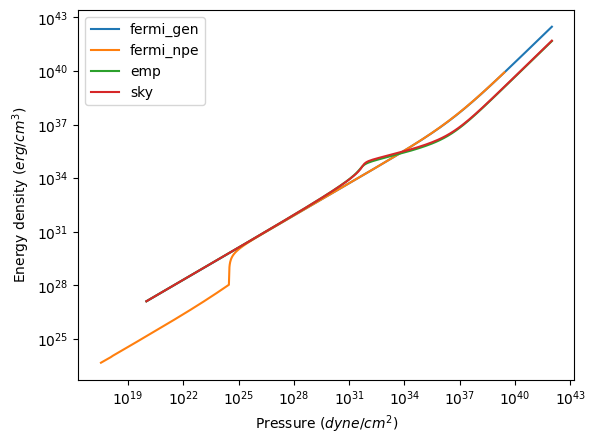

In [53]:
# Comparison of equations of state
file_names = ["fermi_gen", "fermi_npe", "emp", "sky"]

for file_name in file_names:
    pressures = []
    energy_densities = []

    file_path = "data/" + file_name + ".csv"

    with open(f"{file_path}", "r") as file:
        next(file)
        for line in file:
            n, p, e = line.strip().split(",")
            pressures.append(float(p))
            energy_densities.append(float(e))

    plt.plot(pressures, energy_densities, label=file_name)

plt.ylabel("Energy density ($erg / cm^3$)")
plt.yscale("log")
plt.xlabel("Pressure ($dyne / cm^2$)")
plt.xscale("log")
plt.legend()
plt.show()

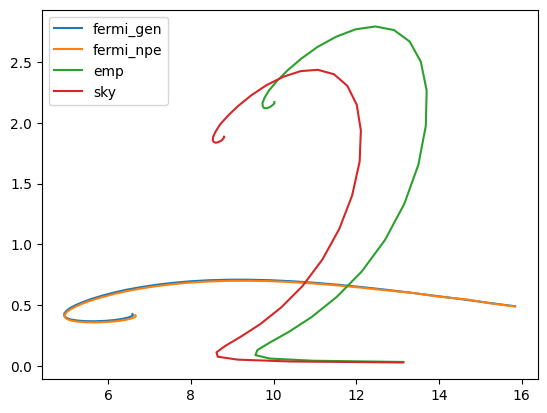

In [54]:
# Generic degenerate ideal Fermi gas of neutron
file_path = "data/fermi_gen.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
range_initial_pressures = np.logspace(34, 39.3, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="fermi_gen")

# Degenerate ideal Fermi gas of neutron, protons and electrons
file_path = "data/fermi_npe.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
range_initial_pressures = np.logspace(34, 39.3, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="fermi_npe")

# Empirical interactions
file_path = "data/emp.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
range_initial_pressures = np.logspace(32.6, 40, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="emp")

# Skyrme Hatree-Fock interactions
file_path = "data/sky.csv"
EoS = EquationOfState()
EoS.load_from_file(file_path)
eos= EoS.interpolate() 
range_initial_pressures = np.logspace(32.7, 40, 40)
solver = SolverRangePressure(eos, relativity_corrections=True)
solver.solve(resolution, range_initial_pressures)
r, m, p = solver.get()
plt.plot(r, m, label="sky")

plt.legend()
plt.show()